In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt

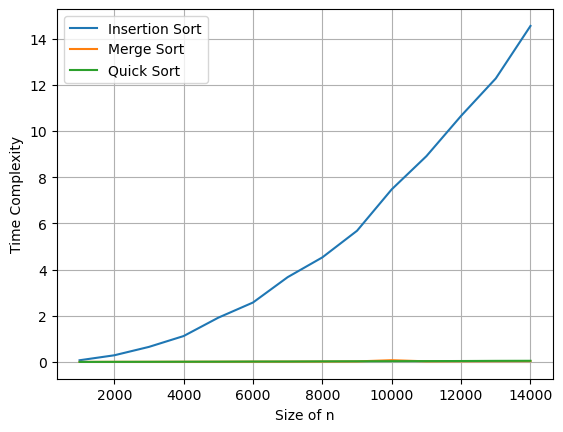

In [6]:
def swap(lst, i, j):
    temp = lst[i]
    lst[i] = lst[j]
    lst[j] = temp
    return lst
    
def insertionSort(A): # Sort A of size n
    for pos in range(1, len(A)):
        nextpos = pos
        while nextpos > 0 and A[nextpos] < A[nextpos-1]:
            swap(A,nextpos,nextpos-1) 
            nextpos = nextpos-1

# merge sort
def merge_sort(a):
    if len(a) >= 2:
        # split list into two halves
        left  = a[0: len(a)//2]
        right = a[len(a)//2: len(a)]

        # sort the two halves
        merge_sort(left)
        merge_sort(right)

        # merge the sorted halves into a sorted whole
        merge(a, left, right)

def merge(result, left, right):
    i1 = 0   # index into left list
    i2 = 0   # index into right list

    for i in range(0, len(result)):
        if i2 >= len(right) or (i1 < len(left) and left[i1] <= right[i2]):
            result[i] = left[i1]    # take from left
            i1 += 1
        else:
            result[i] = right[i2]   # take from right
            i2 += 1

## Quick Sort ##
def partition(A,low,high):
    i = ( low-1 )         # index of smaller element
    pivot = A[high]     # pivot

    for j in range(low , high):

        # If current element is smaller than or
        # equal to pivot
        if   A[j] <= pivot:

            # increment index of smaller element
            i = i+1
            A[i],A[j] = A[j],A[i]

    A[i+1],A[high] = A[high],A[i+1]
    return ( i+1 )

# Function to do Quick sort
def quickSort(A,low,high):
    if low < high:
        # pi is partitioning index, arr[p] is now
        # at right place
        pi = partition(A,low,high)

        # Separately sort elements before
        # partition and after partition
        quickSort(A, low, pi-1)
        quickSort(A, pi+1, high)

sorts = [
    {
        "name": "Insertion Sort",
        "sort": lambda A: insertionSort(A)
    },
    {
        "name": "Merge Sort",
        "sort": lambda A: merge_sort(A)
    },
    {
        "name": "Quick Sort",
        "sort": lambda A: quickSort(A, 0, len(A) - 1)
    }
]

elements = np.array([i*1000 for i in range(1, 15)])

plt.xlabel('Size of n')
plt.ylabel('Time Complexity')

for sort in sorts:
    times = list()
    start_all = time.time()
    for i in range(1, 15):
        start = time.time()
        a = np.random.randint(1000, size = i * 1000)
        sort["sort"](a)
        end = time.time()
        times.append(end - start)
    end_all = time.time()

    plt.plot(elements, times, label = sort["name"])

plt.grid()
plt.legend()
plt.show()